#**Smoke Detection**

###**Data Understanding**

In [1]:
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/smoke_detection_iot.csv")

In [4]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
df.shape

(62630, 16)

In [6]:
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [8]:
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

This Data Set contain all numericals columns with no null counts

###**EDA**
* Column Cleaning Handling

First column is of no use..so drop it

In [9]:

df.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


###### **Outlier Handling if any**

In [10]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
90%,1.654904e+09,27.040000,55.050000,1356.000000,628.000000,13220.000000,20575.000000,939.673000,2.370000,2.460000,16.280000,2.540000,0.058000,21862.000000,1.000000
95%,1.655127e+09,28.940000,56.590000,1431.000000,723.000000,13256.000000,20677.000000,939.719000,2.560000,2.660000,17.610000,2.748000,0.063000,23427.550000,1.000000
99%,1.655129e+09,51.984200,62.407100,60000.000000,9562.360000,13569.000000,21187.000000,939.813000,3814.543200,4739.131600,21379.849000,4974.290990,389.909840,24680.000000,1.000000


In [11]:
num_col=['UTC','CNT' ,'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'Fire Alarm']

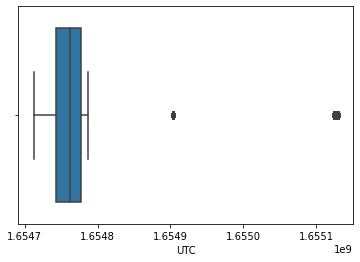

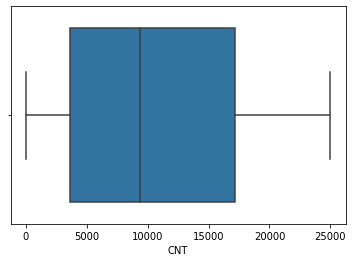

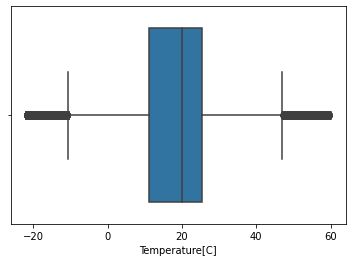

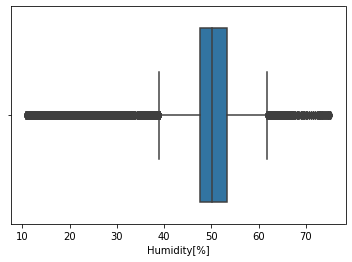

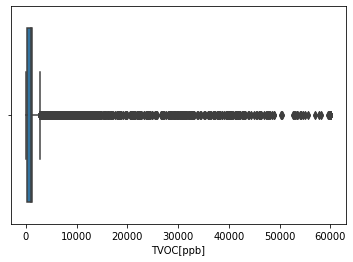

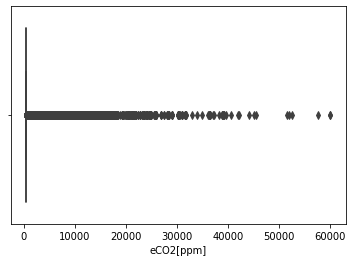

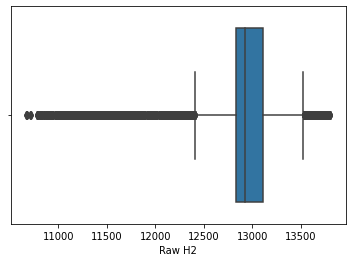

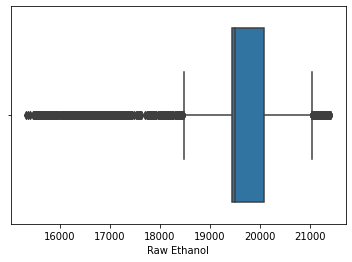

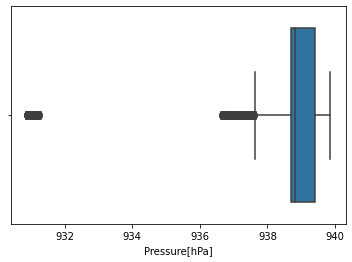

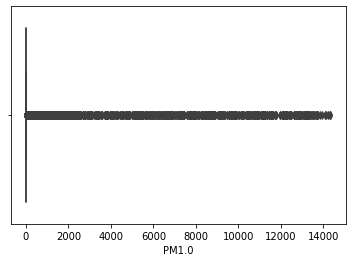

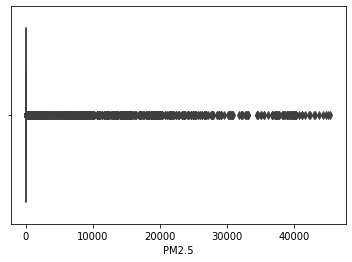

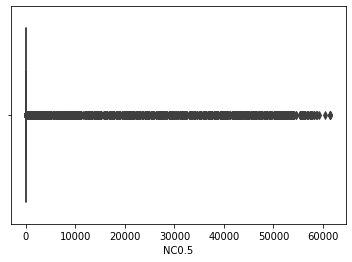

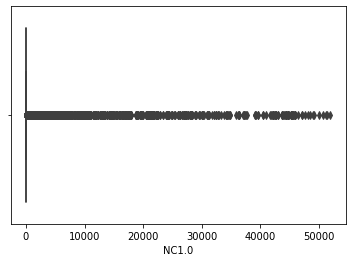

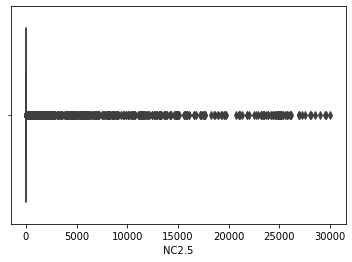

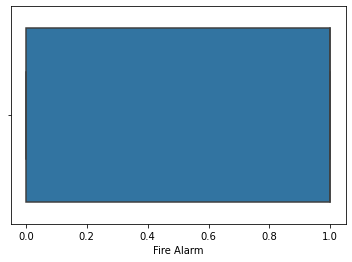

In [12]:
for i in num_col:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

**Few Columns have very Noisy Box Plot distribution**

In [13]:
for i in num_col:
   print("Value Count of",i,":",df[i].nunique())

Value Count of UTC : 62630
Value Count of CNT : 24994
Value Count of Temperature[C] : 21672
Value Count of Humidity[%] : 3890
Value Count of TVOC[ppb] : 1966
Value Count of eCO2[ppm] : 1713
Value Count of Raw H2 : 1830
Value Count of Raw Ethanol : 2659
Value Count of Pressure[hPa] : 2213
Value Count of PM1.0 : 1337
Value Count of PM2.5 : 1351
Value Count of NC0.5 : 3093
Value Count of NC1.0 : 4113
Value Count of NC2.5 : 1161
Value Count of Fire Alarm : 2


**Correlation**

In [14]:
df.corr()["Fire Alarm"]

UTC              -0.389404
Temperature[C]   -0.163902
Humidity[%]       0.399846
TVOC[ppb]        -0.214743
eCO2[ppm]        -0.097006
Raw H2            0.107007
Raw Ethanol      -0.340652
Pressure[hPa]     0.249797
PM1.0            -0.110552
PM2.5            -0.084916
NC0.5            -0.128118
NC1.0            -0.082828
NC2.5            -0.057707
CNT               0.673762
Fire Alarm        1.000000
Name: Fire Alarm, dtype: float64

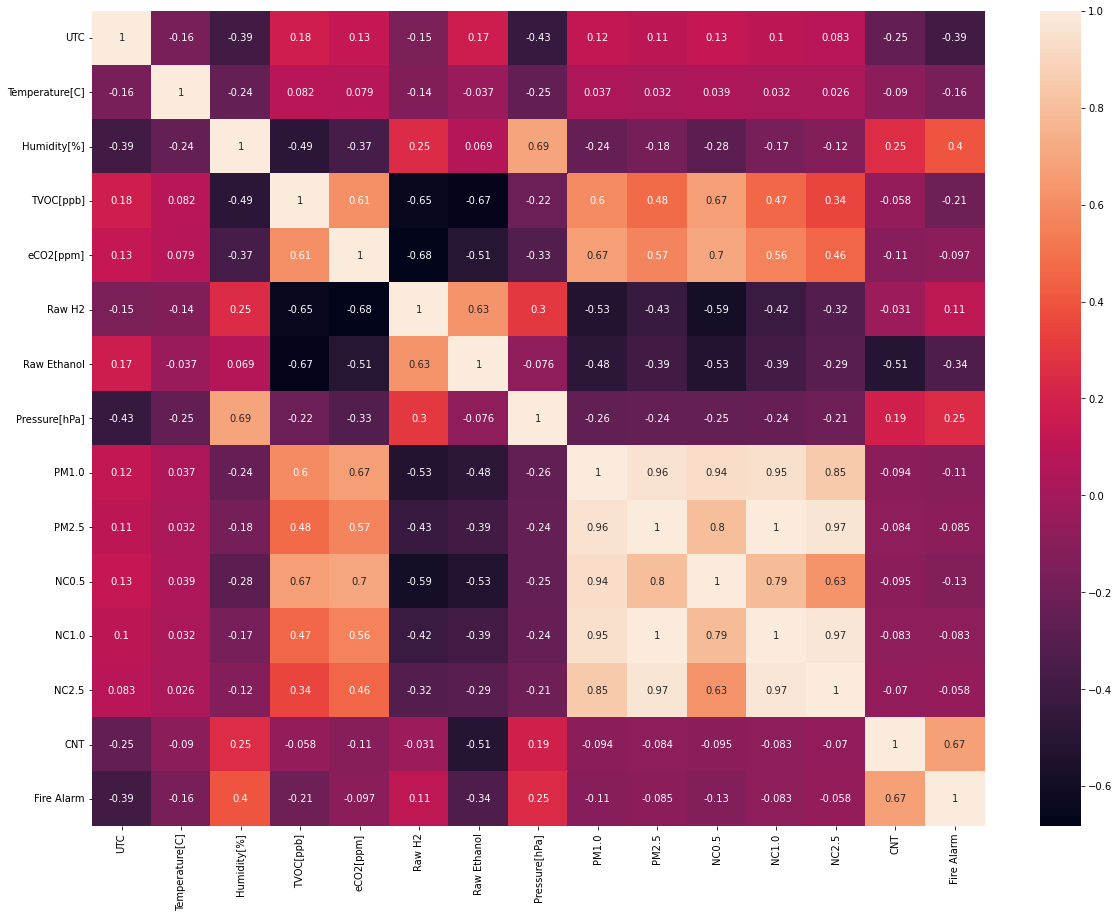

In [15]:

plt.figure(figsize=[20,15])
sns.heatmap(df.corr(), annot=True)
plt.show()

PM1.0','PM2.5','NC0.5','NC1.0','NC2.5
These Columns has high correlation among each other but very less with our target variable i.e Fire Alarm.

######*MVF*

In [16]:
#**VIF for multicollinearity**

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = num_col=df[['UTC','CNT','Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'Fire Alarm']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.453114e+06,UTC
1,3.202168e+00,CNT
2,1.132802e+00,Temperature[C]
3,3.486638e+00,Humidity[%]
4,5.178557e+00,TVOC[ppb]
5,2.874459e+00,eCO2[ppm]
6,3.435355e+00,Raw H2
7,8.021379e+00,Raw Ethanol
8,2.950555e+00,Pressure[hPa]
9,9.729414e+10,PM1.0


We will drop 'UTC','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5 as this are the column with high VIF and also their distribution and boxplot is noisy

In [18]:
df.drop([ 'UTC','PM1.0','PM2.5','NC0.5','NC1.0','NC2.5'   ], axis=1,inplace=True)

In [19]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0,0
1,20.015,56.67,0,400,12345,18651,939.744,1,0
2,20.029,55.96,0,400,12374,18764,939.738,2,0
3,20.044,55.28,0,400,12390,18849,939.736,3,0
4,20.059,54.69,0,400,12403,18921,939.744,4,0


######**Outlier Handling**

In [50]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95])

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],CNT,Fire Alarm
count,49153.000000,49153.000000,49153.000000,49153.000000,49153.000000,49153.000000,49153.000000,49153.000000,49153.000000
mean,14.777117,49.539199,646.036336,407.510264,13006.025105,19876.879845,938.794680,10734.375420,0.682685
std,13.837777,6.502426,592.938876,14.722709,180.563982,480.523281,0.876339,8309.883279,0.465436
min,-22.010000,11.920000,0.000000,400.000000,12306.000000,18520.000000,930.883000,0.000000,0.000000
25%,8.868000,47.670000,88.000000,400.000000,12885.000000,19432.000000,938.700000,3054.000000,0.000000
50%,19.640000,50.210000,324.000000,400.000000,12968.000000,19911.000000,938.770000,7631.000000,1.000000
75%,25.090000,53.290000,1199.000000,409.000000,13132.000000,20144.000000,939.612000,18849.000000,1.000000
90%,26.950000,54.840000,1344.000000,427.000000,13237.000000,20613.000000,939.688000,22535.800000,1.000000
95%,27.760000,56.240000,1379.000000,440.000000,13262.000000,20701.000000,939.742000,23764.400000,1.000000
max,55.190000,75.200000,3493.000000,479.000000,13803.000000,21410.000000,939.861000,24993.000000,1.000000


In [49]:
df["eCO2[ppm]"].mean()

407.5102638699571

* **From above in some columns diff between 95% percentile and Max of colum is high ,
We will clean them**

In [21]:
#outlier removal in Temperature column


#defining thresholds

# as we see most of data is outside the range of 0.25 and 0.75 so not wise to remove.
#so we take 0.05 and 0.95 so that only values very high will be removed 
Q1 = df['Temperature[C]'].quantile(0.05)
Q3 = df['Temperature[C]'].quantile(0.95)

#interquantile range
IQR = Q3 - Q1

#thresholds
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [22]:
df[df['Temperature[C]']> upper_limit]
df[df['Temperature[C]']< lower_limit]

df = df[df['Temperature[C]'] < upper_limit]
df = df[df['Temperature[C]'] > lower_limit]

df.shape

(62630, 9)

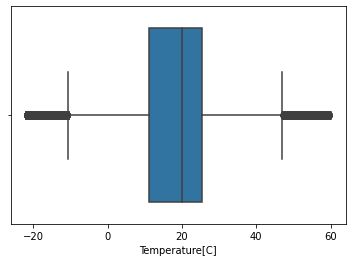

In [23]:
sns.boxplot(df['Temperature[C]'])
plt.show()

In [24]:
#outlier removal in "Humidity[%]" column"

#defining IQR
Q1 = df['Humidity[%]'].quantile(0.05)
Q3 = df['Humidity[%]'].quantile(0.95)
IQR = Q3 - Q1


#thresholds
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

#checking column and removal

df[df['Humidity[%]']> upper_limit]
df[df['Humidity[%]']< lower_limit]

df = df[df['Humidity[%]'] < upper_limit]
df = df[df['Humidity[%]'] > lower_limit]
df.shape

(62630, 9)

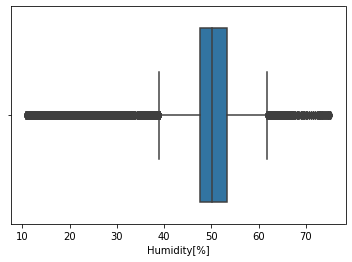

In [25]:
sns.boxplot(df['Humidity[%]'])
plt.show()

In [26]:
#outlier removal in "TVOC[ppb]" column"

#defining IQR
Q1 = df['TVOC[ppb]'].quantile(0.05)
Q3 = df['TVOC[ppb]'].quantile(0.95)
IQR = Q3 - Q1


#thresholds
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

#checking column and removal

df[df['TVOC[ppb]']> upper_limit]
df[df['TVOC[ppb]']< lower_limit]

df = df[df['TVOC[ppb]'] < upper_limit]
df = df[df['TVOC[ppb]'] > lower_limit]
df.shape

(60368, 9)

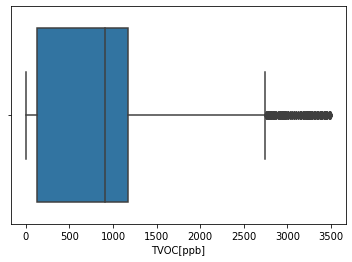

In [27]:
sns.boxplot(df['TVOC[ppb]'])
plt.show()

In [28]:
#outlier removal in "eCO2[ppm]" column"

#defining IQR
Q1 = df['eCO2[ppm]'].quantile(0.05)
Q3 = df['eCO2[ppm]'].quantile(0.75)
IQR = Q3 - Q1


#thresholds
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

#checking column and removal

df[df['eCO2[ppm]']> upper_limit]
df[df['eCO2[ppm]']< lower_limit]

df = df[df['eCO2[ppm]'] < upper_limit]
df = df[df['eCO2[ppm]'] > lower_limit]
df.shape

(49153, 9)

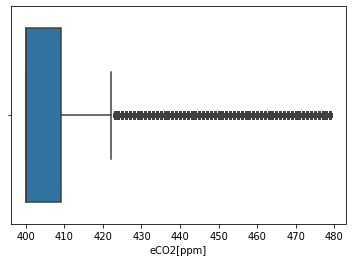

In [46]:
sns.boxplot(df['eCO2[ppm]'])
plt.show()

In [30]:
#outlier removal in "Raw H2" column"

#defining IQR
Q1 = df['Raw H2'].quantile(0.05)
Q3 = df['Raw H2'].quantile(0.95)
IQR = Q3 - Q1


#thresholds
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

#checking column and removal

df[df['Raw H2']> upper_limit]
df[df['Raw H2']< lower_limit]

df = df[df['Raw H2'] < upper_limit]
df = df[df['Raw H2'] > lower_limit]
df.shape

(49153, 9)

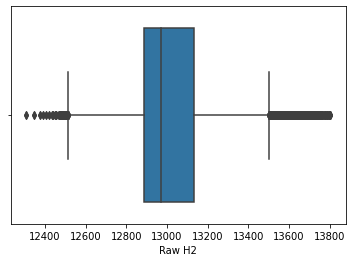

In [31]:
sns.boxplot(df['Raw H2'])
plt.show()

In [32]:
#outlier removal in "Raw Ethanol" column"

#defining IQR
Q1 = df['Raw Ethanol'].quantile(0.05)
Q3 = df['Raw Ethanol'].quantile(0.95)
IQR = Q3 - Q1


#thresholds
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

#checking column and removal

df[df['Raw Ethanol']> upper_limit]
df[df['Raw Ethanol']< lower_limit]

df = df[df['Raw Ethanol'] < upper_limit]
df = df[df['Raw Ethanol'] > lower_limit]
df.shape

(49153, 9)

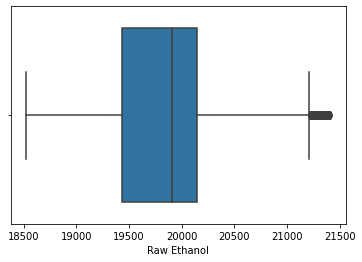

In [33]:
sns.boxplot(df['Raw Ethanol'])
plt.show()

In [34]:
#outlier removal in "CNT" column"

#defining IQR
Q1 = df['CNT'].quantile(0.05)
Q3 = df['CNT'].quantile(0.95)
IQR = Q3 - Q1


#thresholds
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

#checking column and removal

df[df['CNT']> upper_limit]
df[df['CNT']< lower_limit]

df = df[df['CNT'] < upper_limit]
df = df[df['CNT'] > lower_limit]
df.shape

(49153, 9)

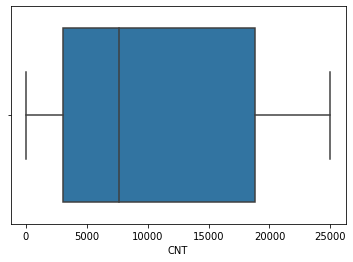

In [35]:
sns.boxplot(df['CNT'])
plt.show()

### **Data Visualization**

In [36]:
df.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'CNT', 'Fire Alarm'],
      dtype='object')

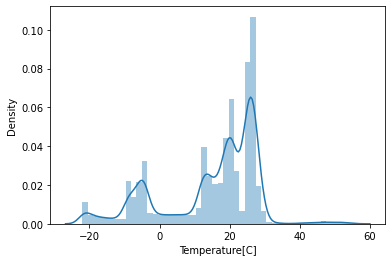

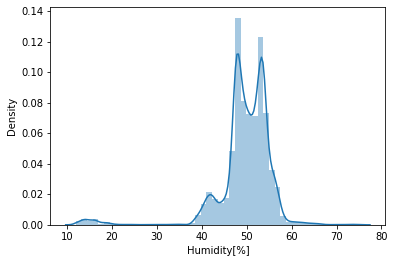

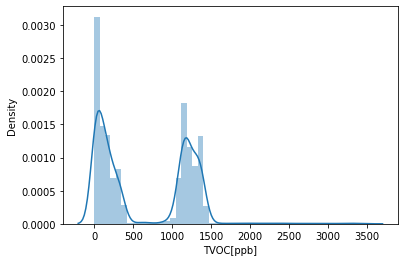

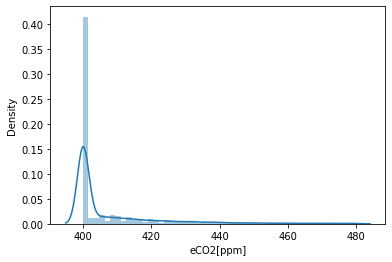

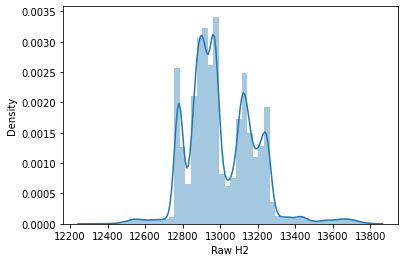

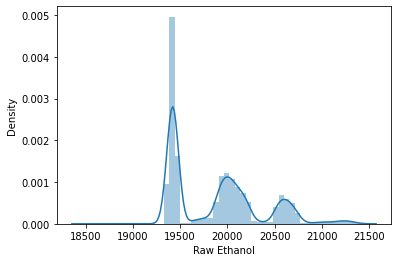

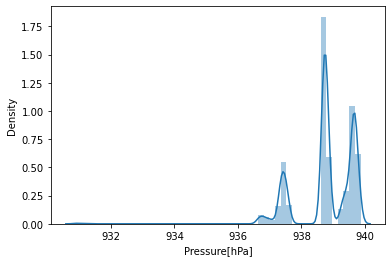

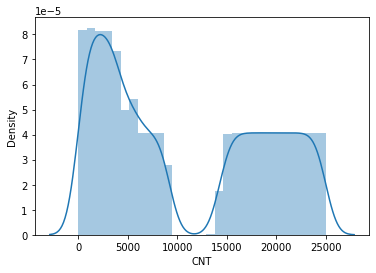

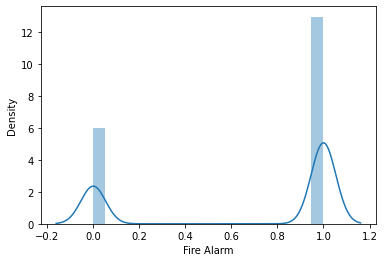

In [37]:
for i in df.columns:
  sns.distplot(df[i])
  plt.xlabel(i)
  plt.show()

In [51]:
df["Fire Alarm"].value_counts()

1    33556
0    15597
Name: Fire Alarm, dtype: int64

* Class Imbalance is Present

######**Visualize Relationship**

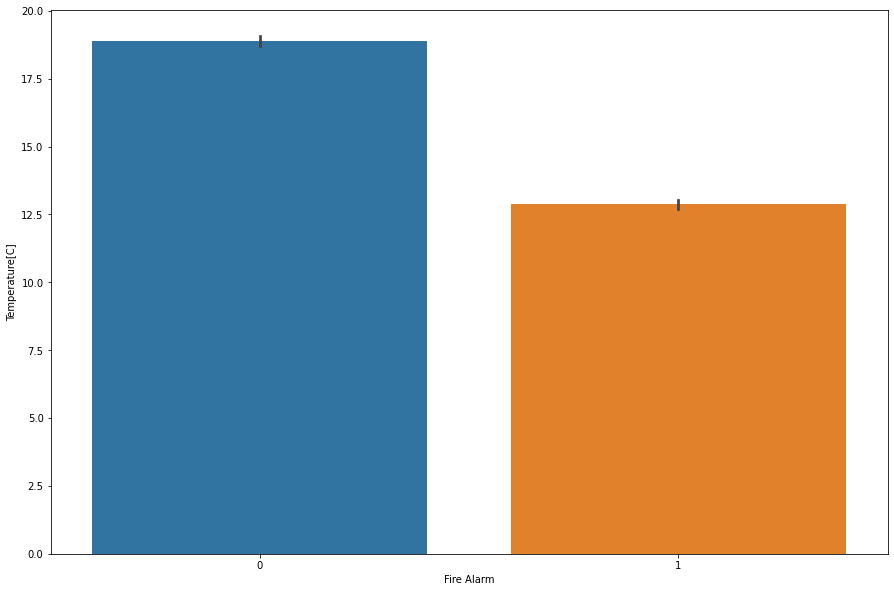

In [52]:
plt.figure(figsize = (15,10))
sns.barplot(x=df['Fire Alarm'],y=df['Temperature[C]'])
plt.show()

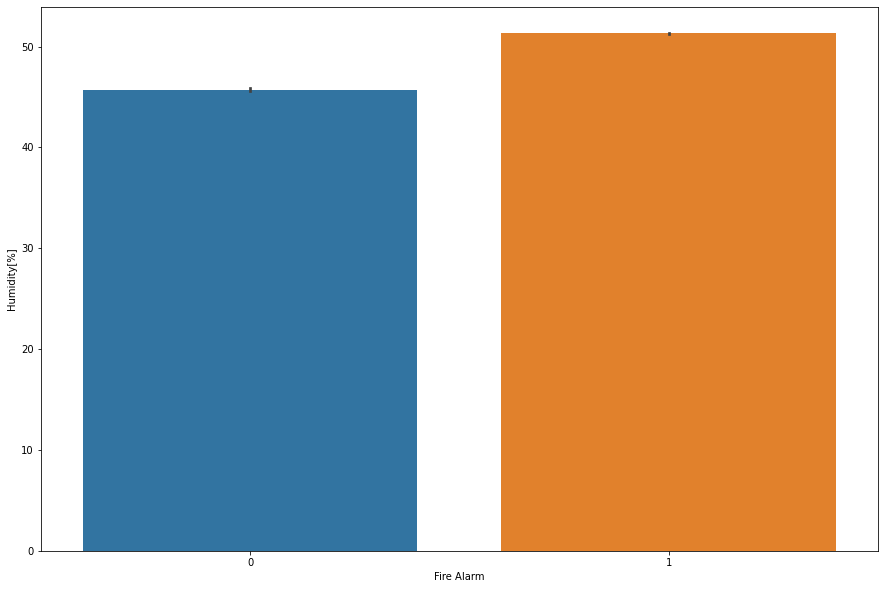

In [53]:
plt.figure(figsize = (15,10))
sns.barplot(x=df['Fire Alarm'],y=df['Humidity[%]'])
plt.show()

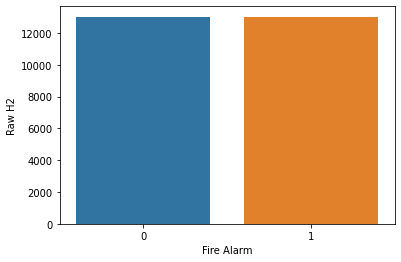

In [54]:
sns.barplot(x=df['Fire Alarm'],y=df['Raw H2'])

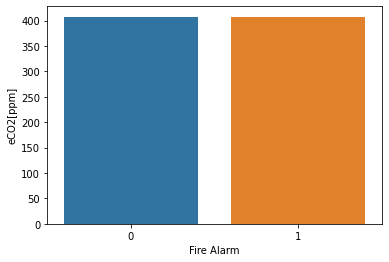

In [55]:
sns.barplot(x=df['Fire Alarm'],y=df['eCO2[ppm]'])

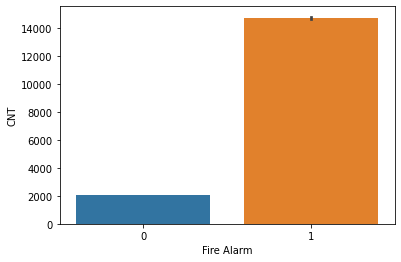

In [56]:
sns.barplot(x=df['Fire Alarm'],y=df['CNT'])

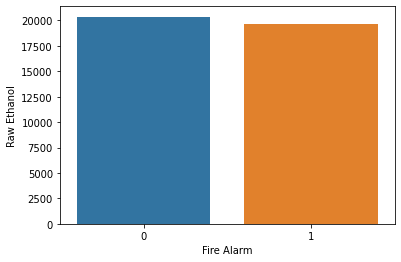

In [57]:
sns.barplot(x=df['Fire Alarm'],y=df['Raw Ethanol'])

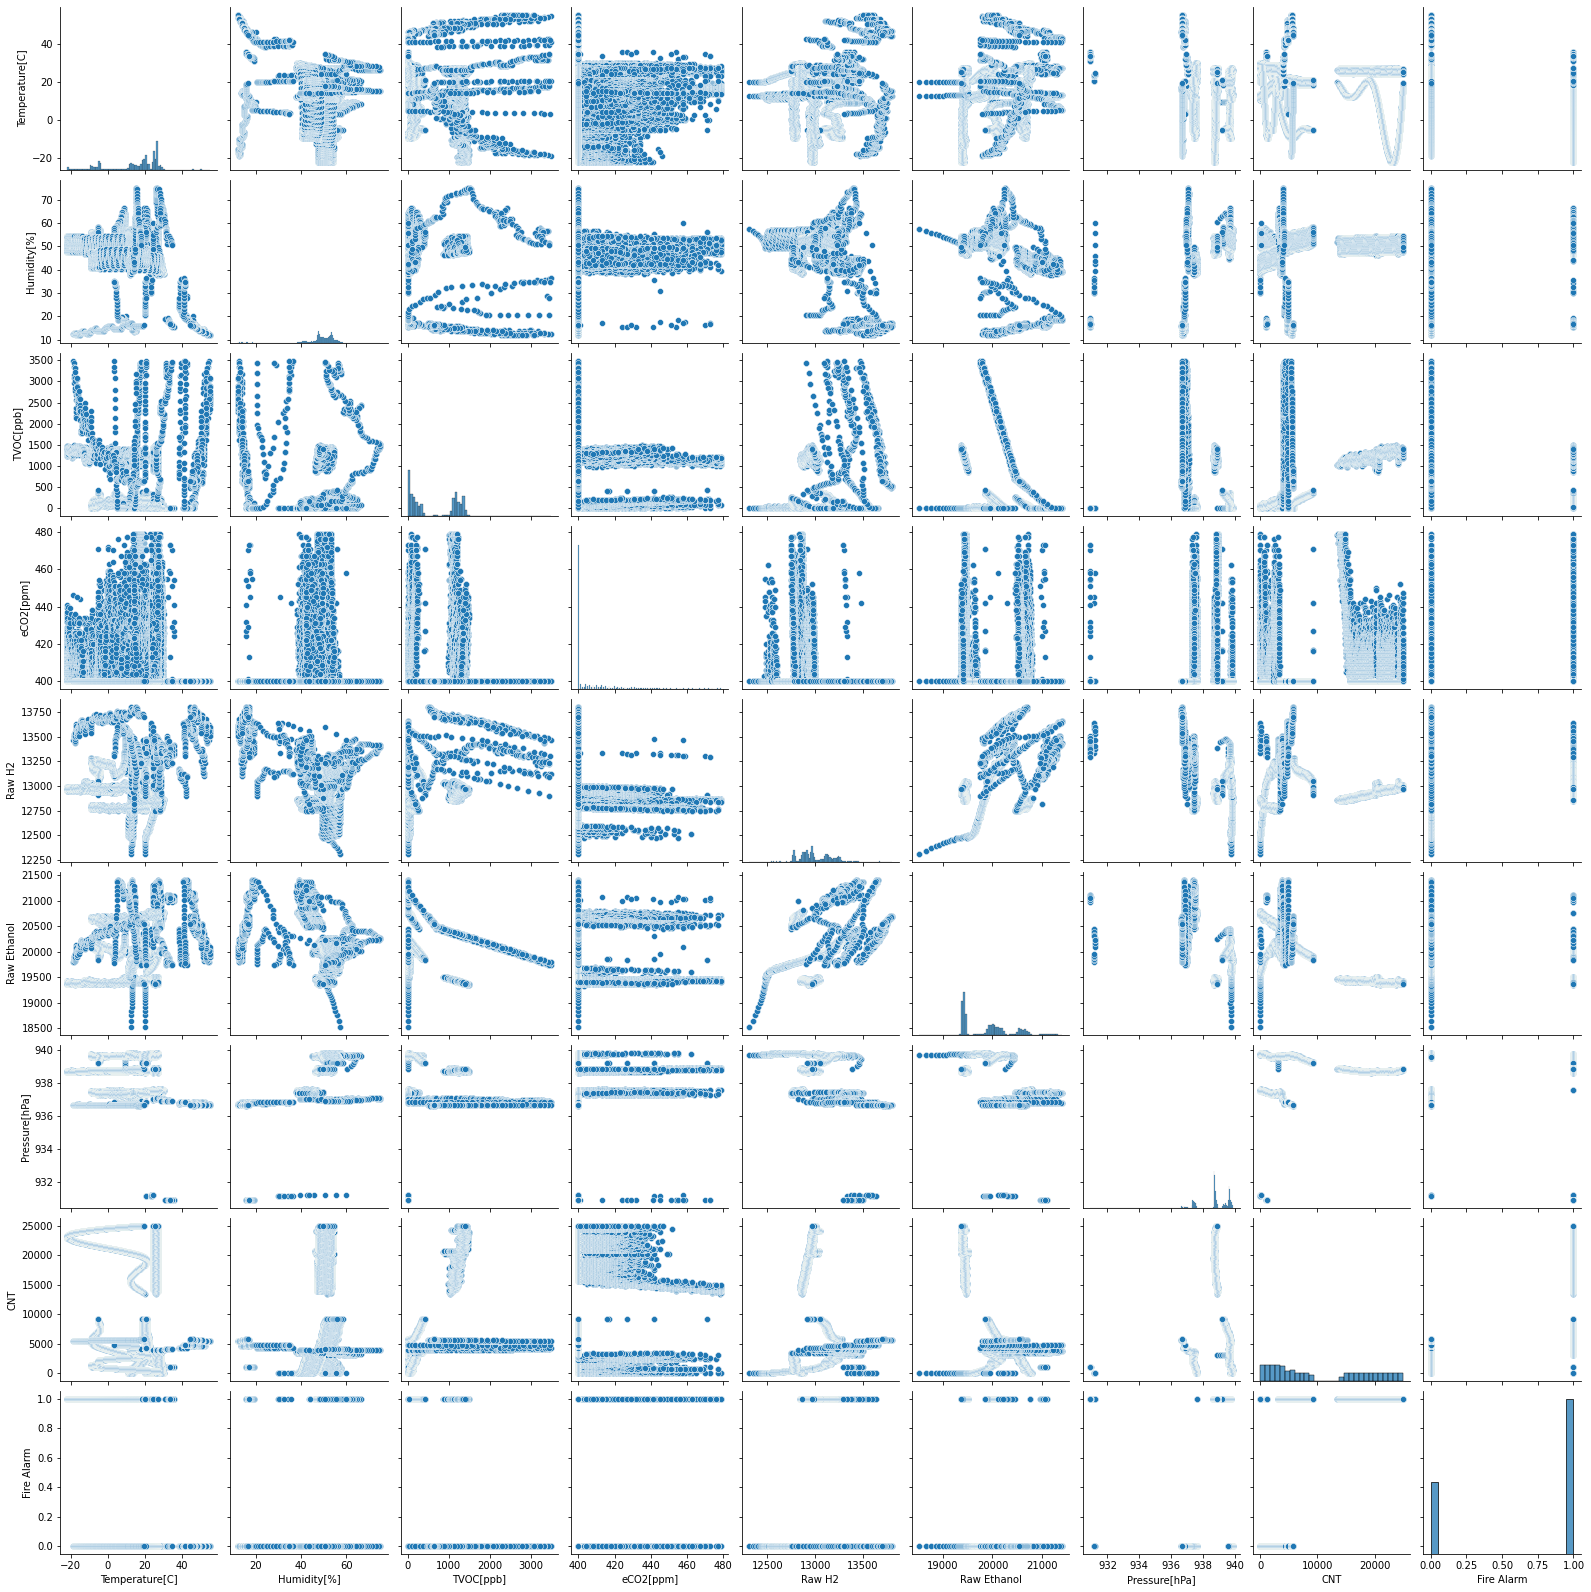

In [58]:
sns.pairplot(df)

###**Model Preparation and Development**

Defining independent and dependent variables

In [64]:
X = df.drop(["Fire Alarm"], axis=1) 
y = df["Fire Alarm"]

In [65]:
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],CNT
0,20.000,57.36,0,400,12306,18520,939.735,0
1,20.015,56.67,0,400,12345,18651,939.744,1
2,20.029,55.96,0,400,12374,18764,939.738,2
3,20.044,55.28,0,400,12390,18849,939.736,3
4,20.059,54.69,0,400,12403,18921,939.744,4


In [66]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire Alarm, dtype: int64

**Scaling**

In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Splitting into training and testing data set

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [69]:
X_train.shape, X_test.shape

((34407, 8), (14746, 8))

#### **1. Logistic Regression**

In [70]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
#applying Logistics Reg

LogReg= LogisticRegression()

#fit model with data
LogReg.fit(X_train,y_train)

#predict test data

y_pred_lr=LogReg.predict(X_test)

In [75]:
#calculating the accuracy of LR of Test Data


print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.9956


In [73]:
#confusion matrix
confusion_matrix(y_test, y_pred_lr)

array([[ 4680,    25],
       [   40, 10001]])

#### **KNN**

In [76]:
#import knn
from sklearn.neighbors import KNeighborsClassifier


#.Create a KNN model instance with n_neighbors=1.
knn=KNeighborsClassifier(n_neighbors=1)


#Fit this KNN model to the training data.
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [77]:
#Use the predict method to predict values using your KNN model and X_test

y_pred_knn=knn.predict(X_test)

In [83]:
#calculating the accuracy of KNN of Test Data


print('Accuracy of knn classifier on test set: {:.4f}'.format(knn.score(X_test, y_test)))

Accuracy of knn classifier on test set: 0.9997


In [79]:
#confusion Matrix
print("Confusion matrix \n")
print(confusion_matrix(y_test,y_pred_knn))

Confusion matrix 

[[ 4703     2]
 [    2 10039]]


In [84]:
#Choosing a K Value

In [85]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

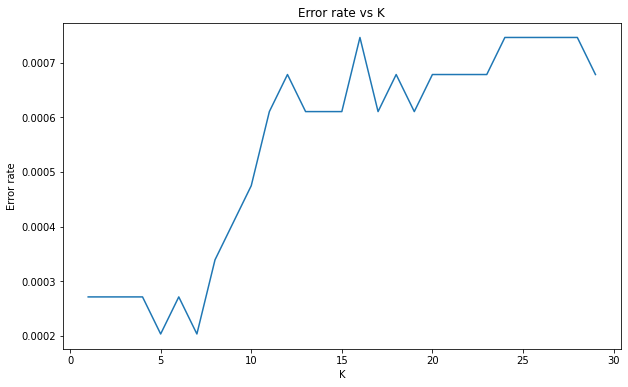

In [97]:
#Create a plot to see how error rate varies with K value

plt.figure(figsize=(10,6))

plt.plot(range(1,30),error_rate,
          markersize=10)


#giving titile, label

plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

In [92]:
# new KNN with K value 5

KNN=KNeighborsClassifier(n_neighbors=5)

#fitting
KNN.fit(X_train,y_train)

#prediciting
pred=KNN.predict(X_test)


#confusion matrix
print(confusion_matrix(y_test,pred))


#classification report
print(classification_report(y_test,pred))

[[ 4703     2]
 [    1 10040]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4705
           1       1.00      1.00      1.00     10041

    accuracy                           1.00     14746
   macro avg       1.00      1.00      1.00     14746
weighted avg       1.00      1.00      1.00     14746



In [93]:
#confusion matrix
print(confusion_matrix(y_test,pred))


#classification report
print(classification_report(y_test,pred))

[[ 4703     2]
 [    1 10040]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4705
           1       1.00      1.00      1.00     10041

    accuracy                           1.00     14746
   macro avg       1.00      1.00      1.00     14746
weighted avg       1.00      1.00      1.00     14746



In [94]:
#calculating the accuracy of KNN with k=5 of Test Data


print('Accuracy of KNN classifier on test set: {:.4f}'.format(KNN.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.9998


####**Random Forest**

In [99]:
from  sklearn.ensemble  import  RandomForestClassifier

classifier_rf  =  RandomForestClassifier( random_state=42)

In [100]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [108]:
#calculating the accuracy of RF on trainings


print('Accuracy of RFclassifier on train set: {:.4f}'.format(classifier_rf.score(X_train, y_train)))

Accuracy of RFclassifier on train set: 1.0000


In [104]:
#predicting Test Data

y_pred_rf = classifier_rf.predict(X_test)

#confusion matrix
confusion_matrix(y_test, y_pred_rf)

array([[ 4705,     0],
       [    0, 10041]])

In [106]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4705
           1       1.00      1.00      1.00     10041

    accuracy                           1.00     14746
   macro avg       1.00      1.00      1.00     14746
weighted avg       1.00      1.00      1.00     14746



In [107]:
#calculating the accuracy of RF on trainings


print('Accuracy of RFclassifier on test set: {:.4f}'.format(classifier_rf.score(X_test, y_test)))

Accuracy of RFclassifier on test set: 1.0000


**Apply Random Forest by Removing Imbalance-SMOTE**

In [110]:
from sklearn.model_selection import cross_val_score

In [112]:
# Import SMOTE module
from sklearn import metrics
from imblearn.over_sampling import SMOTE



# Create model and fit the training set to create a new training set
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())



# Create random forest model
forest = RandomForestClassifier()


# Fit the model to the new train set
forest.fit(X_train_res, y_train_res.ravel())

#Test out-of-sample test set
y_pred = forest.predict(X_test)

# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))


# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring ='accuracy',cv=10)
print('cross validation score with "accuracy" scoring',accuracy.mean())


# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy1 = cross_val_score(forest, X, y,scoring ='roc_auc_ovr',cv=10)
print('cross validation score with "roc_auc_ovr" scoring',accuracy1.mean())

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      4705
           1      1.000     1.000     1.000     10041

    accuracy                          1.000     14746
   macro avg      1.000     1.000     1.000     14746
weighted avg      1.000     1.000     1.000     14746

cross validation score with "accuracy" scoring 0.9983112919633774
cross validation score with "roc_auc_ovr" scoring 0.9979013685708658


**SUMMARY**

* Every Model has Good Accuracy
* Random Forest accuracy is better than all
* SMOTE increase the Accuracy